## Importing Libraries and Preparing for Data Processing

In [11]:
import sys
import os
from pathlib import Path
import pandas as pd

sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from data_cleaning import clean_data, flatten_instagram_json, flatten_reels_json
from engagement_metrics import calculate_engagement_metrics, aggregate_engagement_by_month
from analysis import analyze_engagement_by_time, analyze_engagement_by_content_type
from visualize import plot_monthly_engagement, plot_engagement_rate
from enrichment import load_insights_posts, merge_posts_with_insights, load_reels_insights
from segmentation_analysis import analyze_content_performance_by_type, segment_by_engagement
#from content_type_analysis import categorize_image_content
from predictive_modeling import predict_engagement
from datetime import datetime, timedelta, timezone

## Setting the Root Directory and Loading Data

In [12]:
ROOT = Path(r"C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis")

posts_file = list(ROOT.rglob("your_instagram_activity/media/posts_1.json"))
assert posts_file, "Couldn't find posts JSON. Check your path."
posts_df = flatten_instagram_json(posts_file[0])

posts_df = clean_data(posts_df)
posts_df.head()

Loaded data type: <class 'list'>


c:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\src\data_cleaning.py:153: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["creation_month"] = df["creation_timestamp"].dt.to_period("M")


uri        creation_timestamp  \
0         media/other/18005202119701873.jpg 2024-12-30 21:00:47+07:00   
1         media/other/18067352005700577.jpg 2024-12-28 21:01:00+07:00   
2         media/other/18045234064965601.jpg 2024-12-26 20:00:44+07:00   
3  media/posts/202412/18021149483636820.jpg 2024-12-25 10:00:39+07:00   
4  media/posts/202412/18108260365453441.jpg 2024-12-25 10:00:39+07:00   

                         title    top_creation_timestamp  \
0                  Cousin Itt.                       NaT   
1  10/100 does not equal 1/10.                       NaT   
2                An old sport.                       NaT   
3                              2024-12-25 10:00:39+07:00   
4                              2024-12-25 10:00:39+07:00   

              top_title dubbing_info media_variants product_tags  \
0                                NaN            NaN          NaN   
1                                NaN            NaN          NaN   
2                                NaN            NaN          NaN   
3  Oh itâs Christmas.          NaN            NaN          NaN   
4  Oh itâs Christmas.          NaN            NaN          NaN   

   media_metadata.camera_metadata.has_camera_metadata  \
0                                              False    
1                                              False    
2                                              False    
3                                              False    
4                                              False    

  cross_post_source.source_app creation_date creation_month top_creation_date  
0                           FB    2024-12-30        2024-12               NaT  
1                           FB    2024-12-28        2024-12               NaT  
2                           FB    2024-12-26        2024-12               NaT  
3                           FB    2024-12-25        2024-12        2024-12-25  
4                           FB    2024-12-25        2024-12        2024-12-25

In [13]:
# reels_file = list(ROOT.rglob("your_instagram_activity/media/reels.json"))
# assert reels_file, "Couldn't find reels JSON. Check your path."
# reels_df = flatten_reels_json(reels_file[0])

# reels_df = clean_data(reels_df)
# reels_df.head()

# posts_df = posts_df.drop(columns=["product_tags"])

# # combined_df = pd.concat([posts_df, reels_df], ignore_index=True)

# # posts_df = combined_df.copy()

In [14]:
posts_df.head()

uri        creation_timestamp  \
0         media/other/18005202119701873.jpg 2024-12-30 21:00:47+07:00   
1         media/other/18067352005700577.jpg 2024-12-28 21:01:00+07:00   
2         media/other/18045234064965601.jpg 2024-12-26 20:00:44+07:00   
3  media/posts/202412/18021149483636820.jpg 2024-12-25 10:00:39+07:00   
4  media/posts/202412/18108260365453441.jpg 2024-12-25 10:00:39+07:00   

                         title    top_creation_timestamp  \
0                  Cousin Itt.                       NaT   
1  10/100 does not equal 1/10.                       NaT   
2                An old sport.                       NaT   
3                              2024-12-25 10:00:39+07:00   
4                              2024-12-25 10:00:39+07:00   

              top_title dubbing_info media_variants product_tags  \
0                                NaN            NaN          NaN   
1                                NaN            NaN          NaN   
2                                NaN            NaN          NaN   
3  Oh itâs Christmas.          NaN            NaN          NaN   
4  Oh itâs Christmas.          NaN            NaN          NaN   

   media_metadata.camera_metadata.has_camera_metadata  \
0                                              False    
1                                              False    
2                                              False    
3                                              False    
4                                              False    

  cross_post_source.source_app creation_date creation_month top_creation_date  
0                           FB    2024-12-30        2024-12               NaT  
1                           FB    2024-12-28        2024-12               NaT  
2                           FB    2024-12-26        2024-12               NaT  
3                           FB    2024-12-25        2024-12        2024-12-25  
4                           FB    2024-12-25        2024-12        2024-12-25

In [15]:
insights_df = load_insights_posts(ROOT)
# reels_insights_df = load_reels_insights(ROOT)
# Asia/Jakarta timezone
LOCAL_TZ = timezone(timedelta(hours=7))

if insights_df["creation_timestamp"].dtype != "datetime64[ns, UTC+07:00]":
    insights_df["creation_timestamp"] = pd.to_datetime(
        insights_df["creation_timestamp"], unit="s", utc=True
    ).dt.tz_convert(LOCAL_TZ)

insights_df.head()
# reels_insights_df.head()    


uri        creation_timestamp  \
0  media/other/18005202119701873.jpg 2024-12-30 21:00:47+07:00   
1  media/other/18067352005700577.jpg 2024-12-28 21:01:00+07:00   
2  media/other/18045234064965601.jpg 2024-12-26 20:00:44+07:00   
3  media/other/17850460545325482.jpg 2024-12-24 22:00:52+07:00   
4  media/other/18365546479137722.jpg 2024-12-23 22:00:56+07:00   

                         title  likes  comments  reach  impressions  saves  \
0                  Cousin Itt.     42         0    926         1047      5   
1  10/100 does not equal 1/10.     37         0   1016         1108      2   
2                An old sport.     26         0    639          698      2   
3        Controlling the view.     57         0   1154         1266      2   
4                   What a do.     47         1    737          805      2   

   shares  profile_visits  follows  
0       2               4        0  
1       1               7        1  
2       0               5        0  
3       0              16        0  
4       1               7        0

In [16]:
insights_df.shape

(205, 11)

### Merging with insights

In [18]:
# merge
posts_enriched = posts_df.merge(
    insights_df,
    how="left",
    on=["uri","creation_timestamp","title"],
)
# Fallback: fill NaNs
for c in ["likes","comments","reach","impressions","saves","shares"]:
    if c not in posts_enriched.columns:
        posts_enriched[c] = 0
    posts_enriched[c] = pd.to_numeric(posts_enriched[c], errors="coerce").fillna(0)

# metrics
posts_enriched = calculate_engagement_metrics(posts_enriched)
posts_enriched.to_csv(r"C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed\posts_enriched.csv", index=False)
posts_enriched.head()

uri        creation_timestamp  \
0         media/other/18005202119701873.jpg 2024-12-30 21:00:47+07:00   
1         media/other/18067352005700577.jpg 2024-12-28 21:01:00+07:00   
2         media/other/18045234064965601.jpg 2024-12-26 20:00:44+07:00   
3  media/posts/202412/18021149483636820.jpg 2024-12-25 10:00:39+07:00   
4  media/posts/202412/18108260365453441.jpg 2024-12-25 10:00:39+07:00   

                         title    top_creation_timestamp  \
0                  Cousin Itt.                       NaT   
1  10/100 does not equal 1/10.                       NaT   
2                An old sport.                       NaT   
3                              2024-12-25 10:00:39+07:00   
4                              2024-12-25 10:00:39+07:00   

              top_title dubbing_info media_variants product_tags  \
0                                NaN            NaN          NaN   
1                                NaN            NaN          NaN   
2                                NaN            NaN          NaN   
3  Oh itâs Christmas.          NaN            NaN          NaN   
4  Oh itâs Christmas.          NaN            NaN          NaN   

   media_metadata.camera_metadata.has_camera_metadata  \
0                                              False    
1                                              False    
2                                              False    
3                                              False    
4                                              False    

  cross_post_source.source_app  ... comments   reach impressions  saves  \
0                           FB  ...      0.0   926.0      1047.0    5.0   
1                           FB  ...      0.0  1016.0      1108.0    2.0   
2                           FB  ...      0.0   639.0       698.0    2.0   
3                           FB  ...      0.0     0.0         0.0    0.0   
4                           FB  ...      0.0     0.0         0.0    0.0   

   shares  profile_visits  follows  followers_count  engagement  \
0     2.0             4.0      0.0             1000        42.0   
1     1.0             7.0      1.0             1000        37.0   
2     0.0             5.0      0.0             1000        26.0   
3     0.0             NaN      NaN             1000         0.0   
4     0.0             NaN      NaN             1000         0.0   

   engagement_rate  
0            0.042  
1            0.037  
2            0.026  
3            0.000  
4            0.000  

[5 rows x 24 columns]

In [19]:
posts_enriched.shape

(319, 24)

# Analysis starts from here

## Aggregating Engagement by Month

C:\Users\stefa\AppData\Local\Temp\ipykernel_25416\512147343.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly["month"] = monthly["creation_timestamp"].dt.to_period("M")


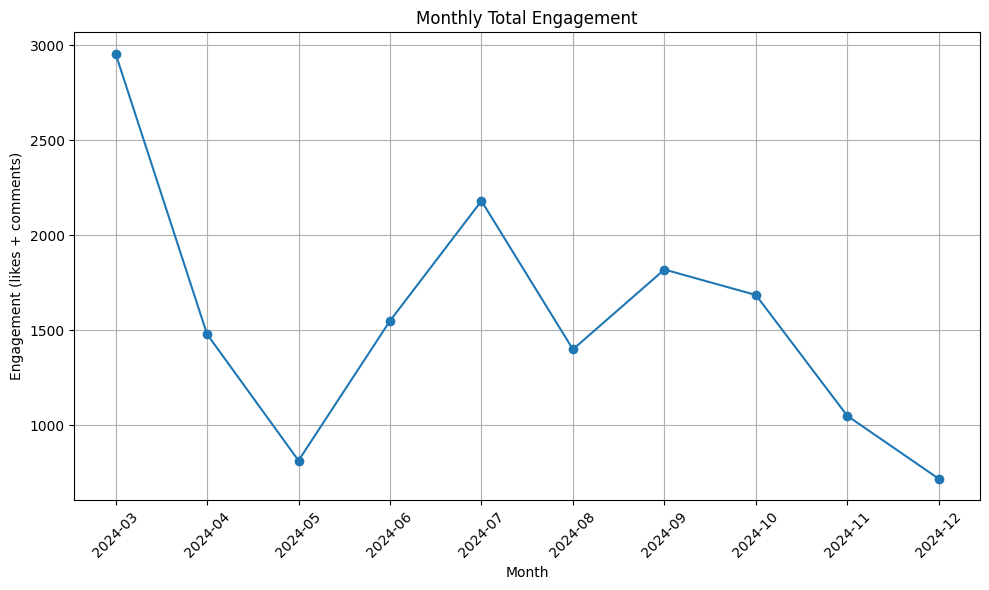

In [51]:
import matplotlib.pyplot as plt

monthly = posts_enriched.copy()
monthly["month"] = monthly["creation_timestamp"].dt.to_period("M")
monthly = (
    monthly.groupby("month")[["likes", "comments", "reach", "impressions", "engagement"]]
    .sum()
    .reset_index()
)
monthly["month"] = monthly["month"].astype(str)

plt.figure(figsize=(10, 6))
plt.plot(monthly["month"], monthly["engagement"], marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Total Engagement")
plt.xlabel("Month")
plt.ylabel("Engagement (likes + comments)")
plt.grid(True)
plt.tight_layout()

save_dir = r"C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed"
filename = "monthly_total_engagement.png"
save_path = os.path.join(save_dir, filename)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()


### Engagement by Time of Day / Day of Week

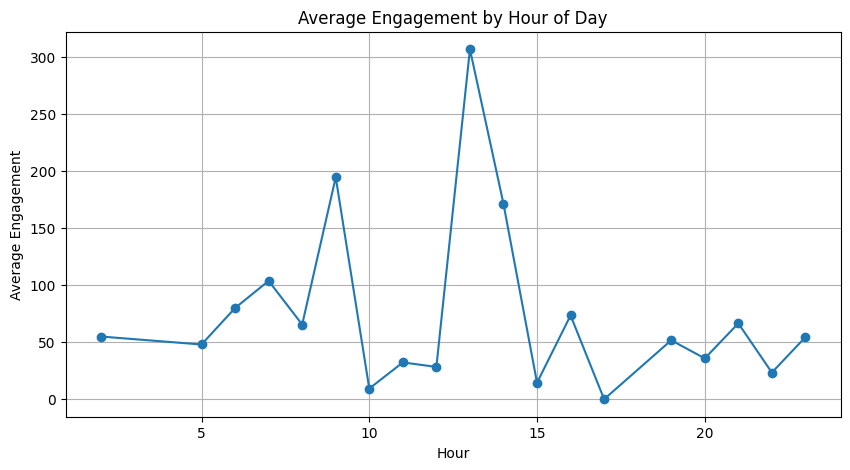

In [26]:
# Extract hour and weekday
posts_enriched["hour"] = posts_enriched["creation_timestamp"].dt.hour
posts_enriched["weekday"] = posts_enriched["creation_timestamp"].dt.day_name()

# Average engagement per hour
hourly = posts_enriched.groupby("hour")["engagement"].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(hourly["hour"], hourly["engagement"], marker="o")
plt.title("Average Engagement by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Engagement")
plt.grid(True)

save_dir = r"C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed"
filename = "average_engagement_by_hour_of_day.png"
save_path = os.path.join(save_dir, filename)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()


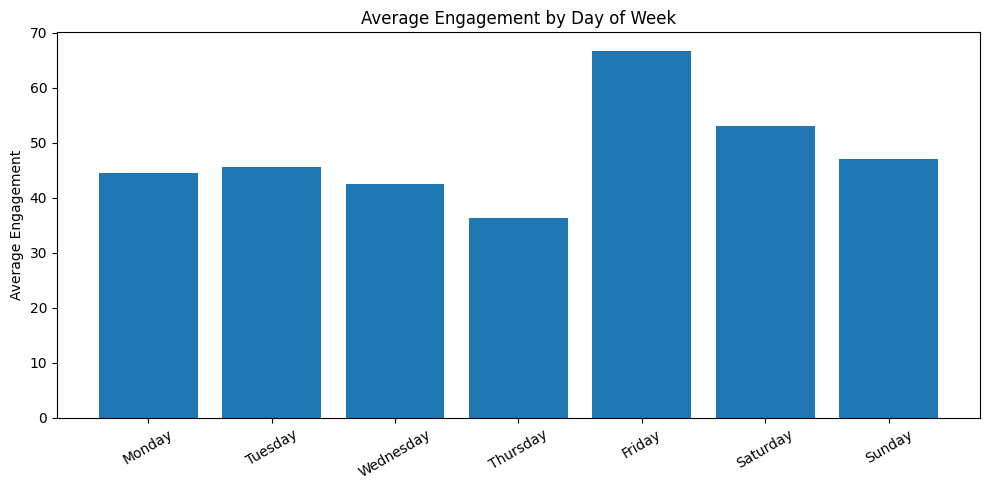

In [27]:
# Average engagement per weekday
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday = (
    posts_enriched.groupby("weekday")["engagement"]
    .mean()
    .reindex(weekday_order)
    .reset_index()
)

plt.figure(figsize=(10, 5))
plt.bar(weekday["weekday"], weekday["engagement"])
plt.title("Average Engagement by Day of Week")
plt.xticks(rotation=30)
plt.ylabel("Average Engagement")
plt.tight_layout()

save_dir = r"C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed"
filename = "avg_engagement_by_day_of_week.png"
save_path = os.path.join(save_dir, filename)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

### Engagement Efficiency

In [29]:
posts_enriched["like_rate"] = (posts_enriched["likes"] / posts_enriched["reach"]).replace([float("inf"), -float("inf")], 0)
posts_enriched["comment_rate"] = (posts_enriched["comments"] / posts_enriched["reach"]).replace([float("inf"), -float("inf")], 0)
posts_enriched["save_rate"] = (posts_enriched["saves"] / posts_enriched["reach"]).replace([float("inf"), -float("inf")], 0)

efficiency = posts_enriched[["uri","title", "reach", "likes", "comments", "saves", "like_rate", "comment_rate", "save_rate"]]
efficiency.sort_values(by="like_rate", ascending=False).head(10)


uri  \
87   media/other/18357843769187639.jpg   
205  media/other/18031969951851726.jpg   
123  media/other/18106327948420268.jpg   
107  media/other/17889103545095709.jpg   
183  media/other/18040563178900075.jpg   
103  media/other/17856666741266562.jpg   
79   media/other/17928717605848607.jpg   
135  media/other/18055332136778544.jpg   
288  media/other/17897838125976076.jpg   
96   media/other/18042295397293158.jpg   

                                        title   reach  likes  comments  saves  \
87                                  Namesake.  1410.0  167.0       9.0    1.0   
205                      Motion in stillness.  2648.0  312.0       6.0   35.0   
123                       Playing dress down.  1815.0  202.0       7.0    5.0   
107                       Devotional rapture.  2921.0  302.0       5.0   29.0   
183                    ____, can I post this?  2670.0  274.0       7.0   24.0   
103         Carina, Carina â¦ â¦. â¦. â¦.  1588.0  157.0       7.0    6.0   
79   Everything we do is in the name of love.  2570.0  254.0      18.0    6.0   
135                             Cannon balls.  2038.0  200.0       7.0   11.0   
288                 Venus surrounded by eggs.   840.0   81.0       1.0    2.0   
96                        Teasing perception.   990.0   93.0       2.0    6.0   

     like_rate  comment_rate  save_rate  
87    0.118440      0.006383   0.000709  
205   0.117825      0.002266   0.013218  
123   0.111295      0.003857   0.002755  
107   0.103389      0.001712   0.009928  
183   0.102622      0.002622   0.008989  
103   0.098866      0.004408   0.003778  
79    0.098833      0.007004   0.002335  
135   0.098135      0.003435   0.005397  
288   0.096429      0.001190   0.002381  
96    0.093939      0.002020   0.006061

### High-Performing Content

In [30]:
top_posts = posts_enriched.sort_values(by="engagement_rate", ascending=False).head(10)
top_posts[["uri","title", "likes", "comments", "reach", "impressions", "engagement_rate"]].head()

uri                             title  \
181  media/other/17936217308853227.jpg            Topography of a tango.   
318  media/other/17948526479776599.jpg       Bite test. Tastes recycled.   
213  media/other/18048633694666140.jpg  99 out of a 100 donât make it.   
182  media/other/18450965923058024.jpg                   The Chosen One.   
205  media/other/18031969951851726.jpg              Motion in stillness.   

     likes  comments    reach  impressions  engagement_rate  
181  464.0       4.0  22855.0      32764.0            0.468  
318  426.0      18.0  27530.0      48572.0            0.444  
213  381.0      22.0  25455.0      42099.0            0.403  
182  312.0      11.0  16793.0      31709.0            0.323  
205  312.0       6.0   2648.0       3024.0            0.318

### Performance Category

In [ ]:
def label_performance(rate):
    if rate >= posts_enriched["engagement_rate"].quantile(0.75):
        return "Quantile 0.75"
    elif rate >= posts_enriched["engagement_rate"].quantile(0.25):
        return "Quantile 0.25"
    else:
        return "Low"

posts_enriched["performance_label"] = posts_enriched["engagement_rate"].apply(label_performance)
posts_enriched["performance_label"].value_counts()
posts_enriched.to_csv(r"C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed\posts_enriched.csv", index=False)
posts_enriched.head()

uri        creation_timestamp  \
0         media/other/18005202119701873.jpg 2024-12-30 21:00:47+07:00   
1         media/other/18067352005700577.jpg 2024-12-28 21:01:00+07:00   
2         media/other/18045234064965601.jpg 2024-12-26 20:00:44+07:00   
3  media/posts/202412/18021149483636820.jpg 2024-12-25 10:00:39+07:00   
4  media/posts/202412/18108260365453441.jpg 2024-12-25 10:00:39+07:00   

                         title    top_creation_timestamp  \
0                  Cousin Itt.                       NaT   
1  10/100 does not equal 1/10.                       NaT   
2                An old sport.                       NaT   
3                              2024-12-25 10:00:39+07:00   
4                              2024-12-25 10:00:39+07:00   

              top_title dubbing_info media_variants product_tags  \
0                                NaN            NaN          NaN   
1                                NaN            NaN          NaN   
2                                NaN            NaN          NaN   
3  Oh itâs Christmas.          NaN            NaN          NaN   
4  Oh itâs Christmas.          NaN            NaN          NaN   

   media_metadata.camera_metadata.has_camera_metadata  \
0                                              False    
1                                              False    
2                                              False    
3                                              False    
4                                              False    

  cross_post_source.source_app  ... saves shares profile_visits  follows  \
0                           FB  ...   5.0    2.0            4.0      0.0   
1                           FB  ...   2.0    1.0            7.0      1.0   
2                           FB  ...   2.0    0.0            5.0      0.0   
3                           FB  ...   0.0    0.0            NaN      NaN   
4                           FB  ...   0.0    0.0            NaN      NaN   

   followers_count  engagement  engagement_rate  hour    weekday  \
0             1000        42.0            0.042    21     Monday   
1             1000        37.0            0.037    21   Saturday   
2             1000        26.0            0.026    20   Thursday   
3             1000         0.0            0.000    10  Wednesday   
4             1000         0.0            0.000    10  Wednesday   

   performance_label  
0      Quantile 0.25  
1      Quantile 0.25  
2      Quantile 0.25  
3      Quantile 0.25  
4      Quantile 0.25  

[5 rows x 27 columns]

In [32]:
posts_enriched.shape

(319, 30)

### Seeing the distribution of the post, but taking 0 and NaN value into considerations

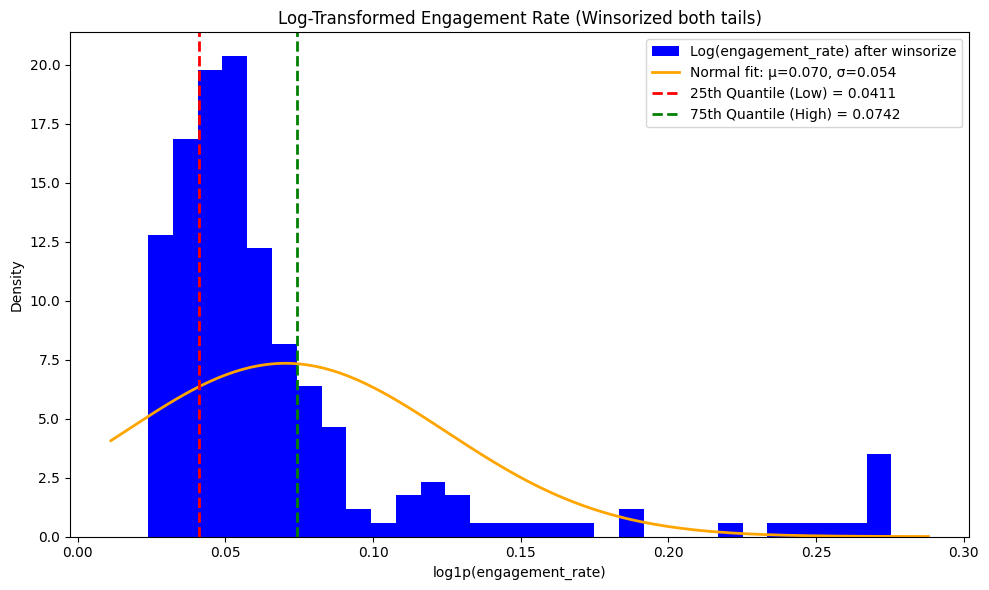

(205, 29)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

posts_model = posts_enriched.copy()

posts_model["engagement_rate"] = posts_model["engagement"] / posts_model["followers_count"]

mask_bad = ~np.isfinite(posts_model["engagement_rate"])
posts_model.loc[mask_bad, "engagement_rate"] = np.nan

posts_model = posts_model[(posts_model["followers_count"] > 0) & (posts_model["reach"] > 0)]

posts_model = posts_model.dropna(subset=["engagement_rate"])

q_lo, q_hi = posts_model["engagement_rate"].quantile([0.02, 0.98])
posts_model["engagement_rate_w"] = posts_model["engagement_rate"].clip(lower=q_lo, upper=q_hi)

posts_model["log_engagement_rate"] = np.log1p(posts_model["engagement_rate_w"])

plt.figure(figsize=(10, 6))
vals = posts_model["log_engagement_rate"].dropna()
plt.hist(vals, bins=30, density=True, label="Log(engagement_rate) after winsorize", color='blue')

mu, std = norm.fit(vals)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 200)
plt.plot(x, norm.pdf(x, mu, std), linewidth=2, label=f"Normal fit: μ={mu:.3f}, σ={std:.3f}", color="orange")

q_lo_log, q_hi_log = posts_model["log_engagement_rate"].quantile([0.25, 0.75])

plt.axvline(q_lo_log, color='red', linestyle='dashed', linewidth=2, label=f"25th Quantile (Low) = {q_lo_log:.4f}")
plt.axvline(q_hi_log, color='green', linestyle='dashed', linewidth=2, label=f"75th Quantile (High) = {q_hi_log:.4f}")

plt.title("Log-Transformed Engagement Rate (Winsorized both tails)")
plt.xlabel("log1p(engagement_rate)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

save_dir = r"C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed"
filename = "engagement_rate_log_transformed.png"
save_path = os.path.join(save_dir, filename)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()
posts_model.shape


In [30]:
def label_performance_log(rate):
    if pd.isna(rate):  
        return "Unknown"  
    if rate >= posts_model['log_engagement_rate'].quantile(0.75):
        return "High"
    elif rate >= posts_model['log_engagement_rate'].quantile(0.25):
        return "Medium"
    else:
        return "Low"


In [31]:
posts_model["performance_label_log"] = posts_model["log_engagement_rate"].apply(label_performance_log)

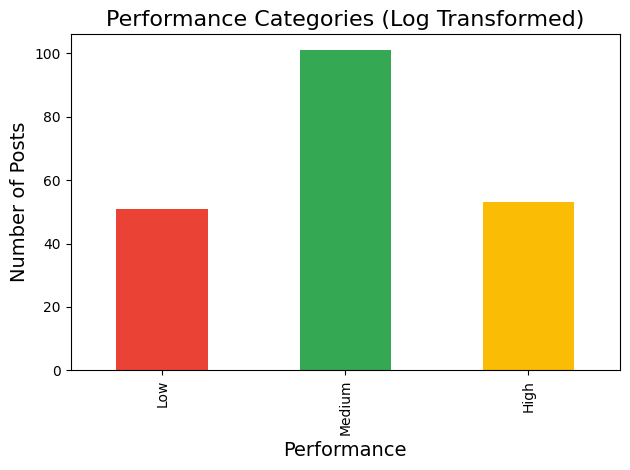

In [50]:
posts_model["performance_label_log"] = posts_model["performance_label_log"].astype(pd.CategoricalDtype(categories=["Low", "Medium", "High"], ordered=True))

posts_model["performance_label_log"].value_counts().sort_index().plot(kind="bar", color=['#ea4335', '#34a853', '#fbbc05'])
plt.title("Performance Categories (Log Transformed)", fontsize=16)
plt.ylabel('Number of Posts', fontsize=14)
plt.xlabel('Performance', fontsize=14)
plt.tight_layout()

save_dir = r"C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed"
filename = "performance_categories.png"
save_path = os.path.join(save_dir, filename)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

## Audience Behavious Analysis

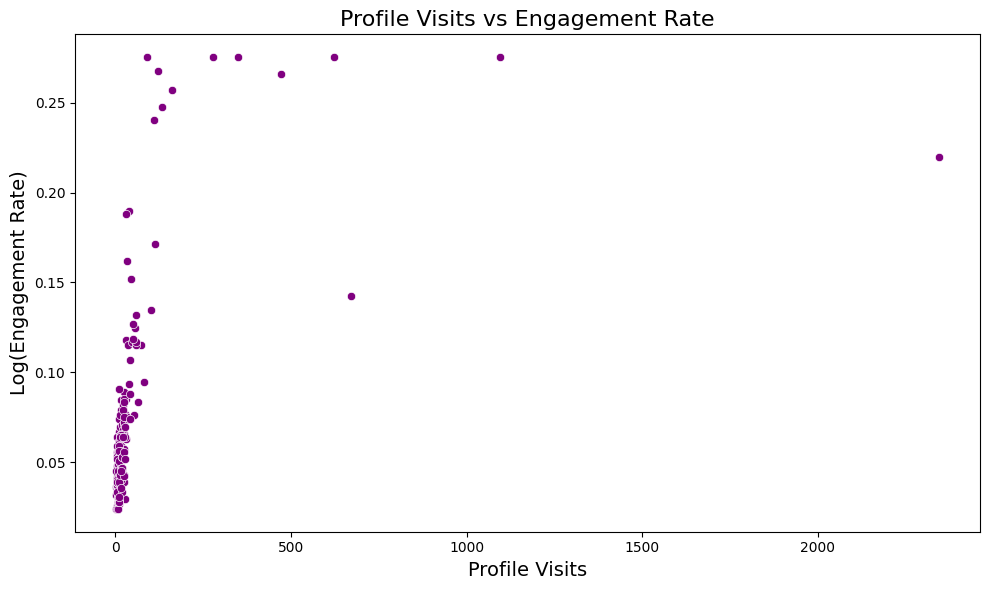

In [33]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=posts_model["profile_visits"], y=posts_model["log_engagement_rate"], color="purple")
plt.title("Profile Visits vs Engagement Rate", fontsize=16)
plt.xlabel("Profile Visits", fontsize=14)
plt.ylabel("Log(Engagement Rate)", fontsize=14)
plt.tight_layout()

save_dir = r"C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed"
filename = "profile_visits_vs_engagement_rate.png"
save_path = os.path.join(save_dir, filename)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()


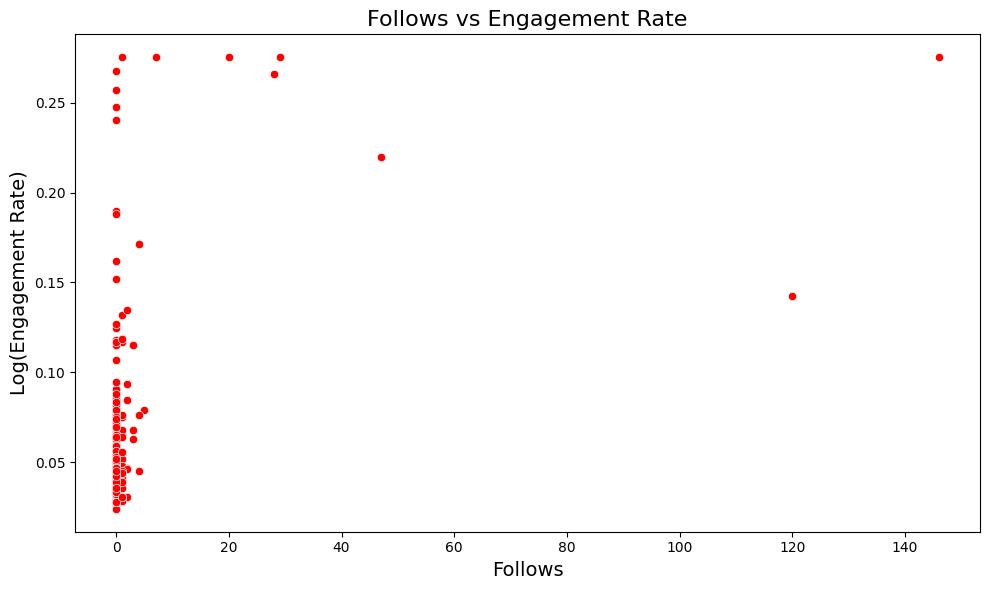

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=posts_model["follows"], y=posts_model["log_engagement_rate"], color="red")
plt.title("Follows vs Engagement Rate", fontsize=16)
plt.xlabel("Follows", fontsize=14)
plt.ylabel("Log(Engagement Rate)", fontsize=14)
plt.tight_layout()

save_dir = r"C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed"
filename = "follow_vs_engagement_rate.png"
save_path = os.path.join(save_dir, filename)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()


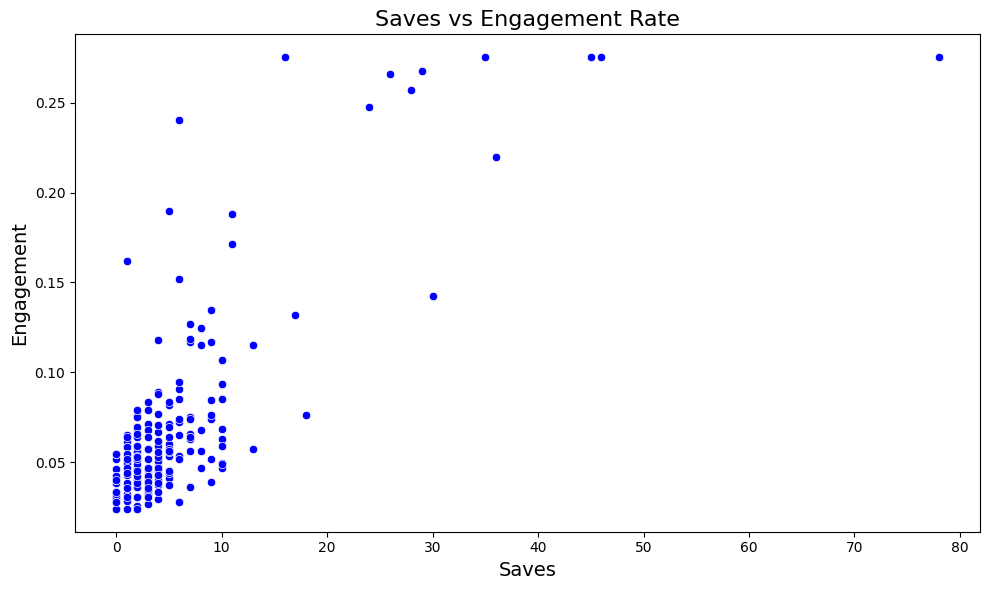

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=posts_model["saves"], y=posts_model["log_engagement_rate"], color="blue")
plt.title("Saves vs Engagement Rate", fontsize=16)
plt.xlabel("Saves", fontsize=14)
plt.ylabel("Engagement", fontsize=14)
plt.tight_layout()

save_dir = r"C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed"
filename = "saves_vs_engagement_rate.png"
save_path = os.path.join(save_dir, filename)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

In [38]:
high_performance_posts = posts_model[posts_model["performance_label_log"] == "High"]

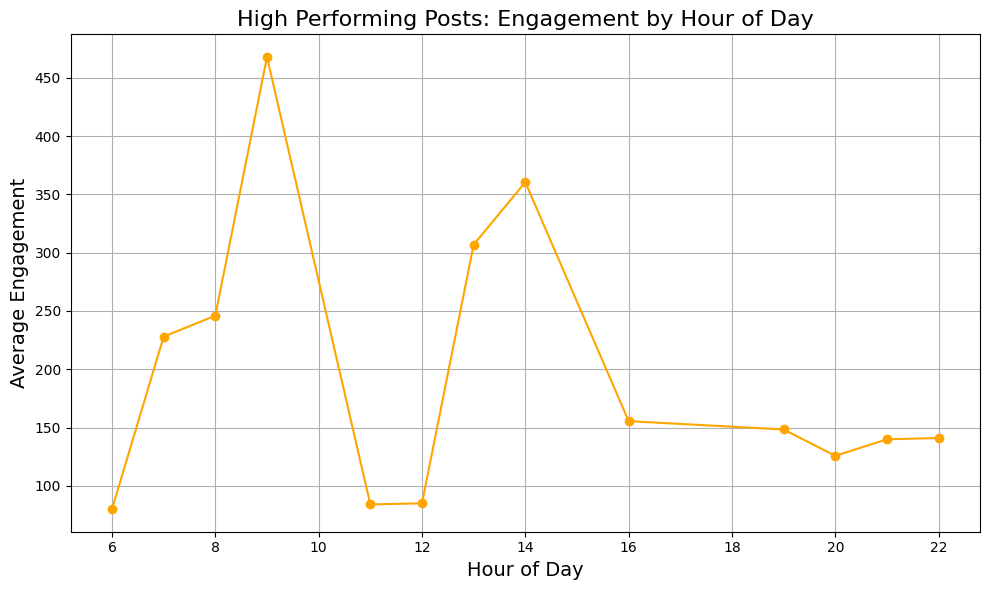

In [40]:
hourly_high = high_performance_posts.groupby("hour")["engagement"].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(hourly_high["hour"], hourly_high["engagement"], marker="o", color="orange")
plt.title("High Performing Posts: Engagement by Hour of Day", fontsize=16)
plt.xlabel("Hour of Day", fontsize=14)
plt.ylabel("Average Engagement", fontsize=14)
plt.grid(True)
plt.tight_layout()

save_dir = r"C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed"
filename = "HPP_engagement_by_hour.png"
save_path = os.path.join(save_dir, filename)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

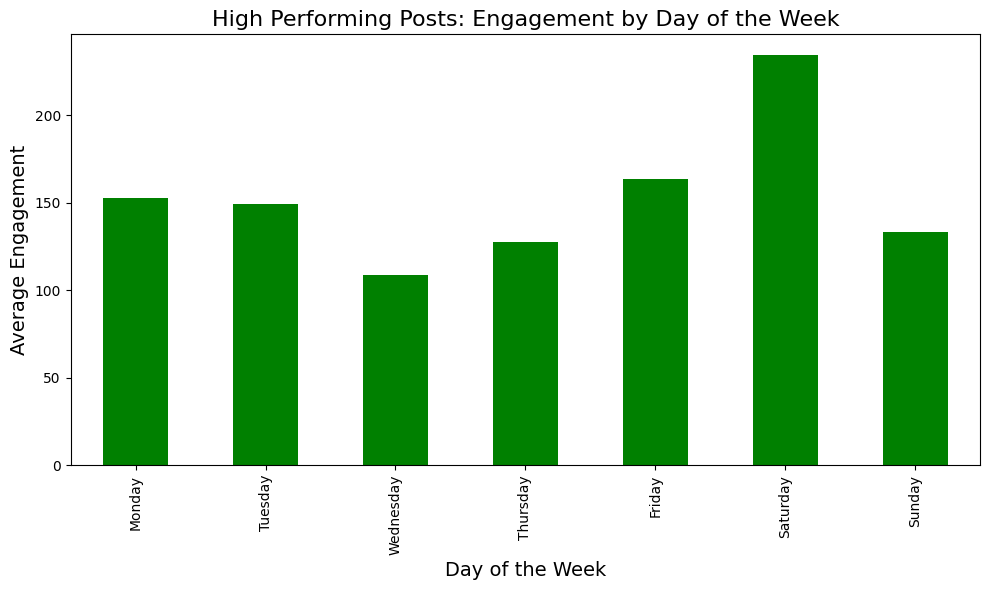

In [41]:
weekday_high = high_performance_posts.groupby("weekday")["engagement"].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

plt.figure(figsize=(10, 6))
weekday_high.plot(kind="bar", color="green")
plt.title("High Performing Posts: Engagement by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Average Engagement", fontsize=14)
plt.tight_layout()

save_dir = r"C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed"
filename = "HPP_engagement_by_day.png"
save_path = os.path.join(save_dir, filename)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

In [43]:
high_performance_posts
high_performance_posts.to_csv(r"C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed\high_performance_posts.csv", index=False)

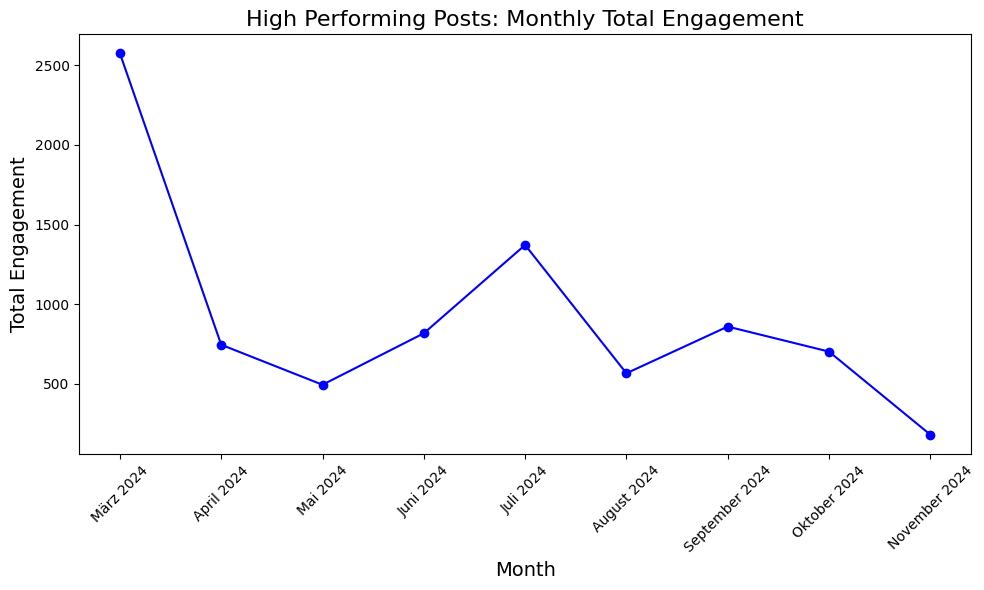

In [44]:
monthly_high = high_performance_posts.groupby("creation_month")["engagement"].sum().reset_index()

monthly_high = monthly_high.sort_values(by="creation_month")

plt.figure(figsize=(10, 6))
plt.plot(monthly_high["creation_month"].dt.strftime('%B %Y'), monthly_high["engagement"], marker="o", color="blue")
plt.title("High Performing Posts: Monthly Total Engagement", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Engagement", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

save_dir = r"C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed"
filename = "HPP_monthly_total_engagement.png"
save_path = os.path.join(save_dir, filename)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

In [45]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

high_performance_posts = posts_model[posts_model["performance_label_log"] == "High"]

high_performance_uris = high_performance_posts["uri"].tolist()

Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/18069261775628727.jpg


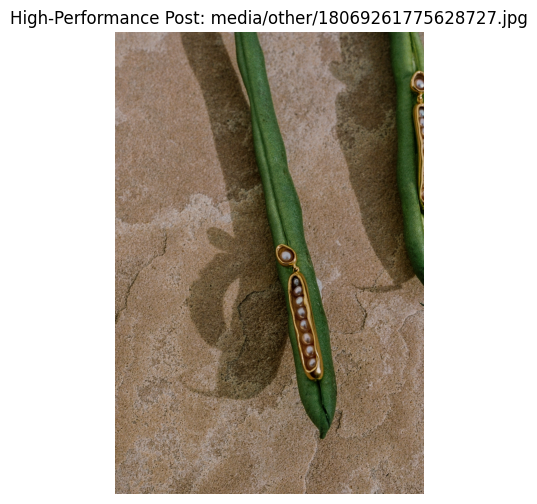

✅ Saved: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed\HPP_1.png
Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/17947111085860729.jpg


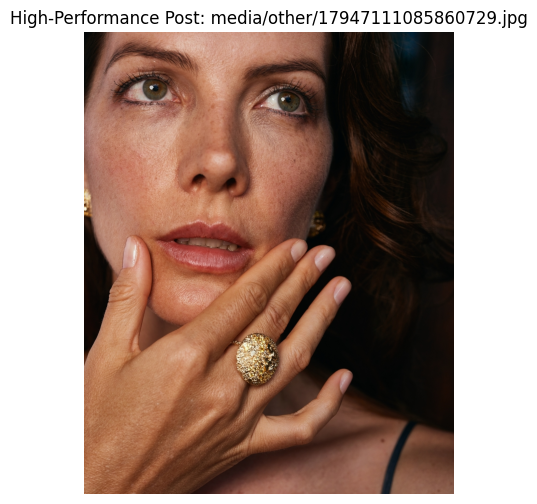

✅ Saved: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed\HPP_2.png
Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/17928717605848607.jpg


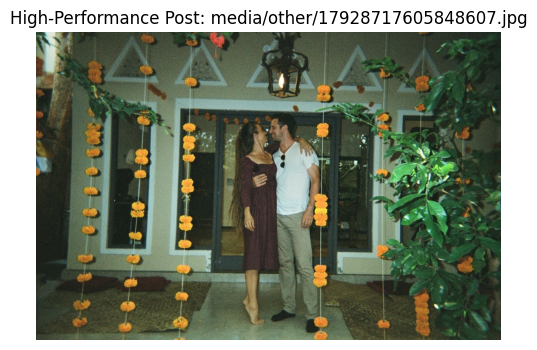

✅ Saved: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed\HPP_3.png
Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/18357843769187639.jpg


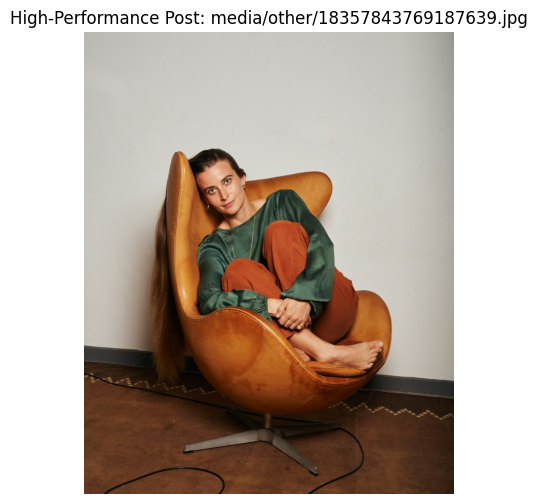

✅ Saved: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed\HPP_4.png
Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/18439507759069649.jpg


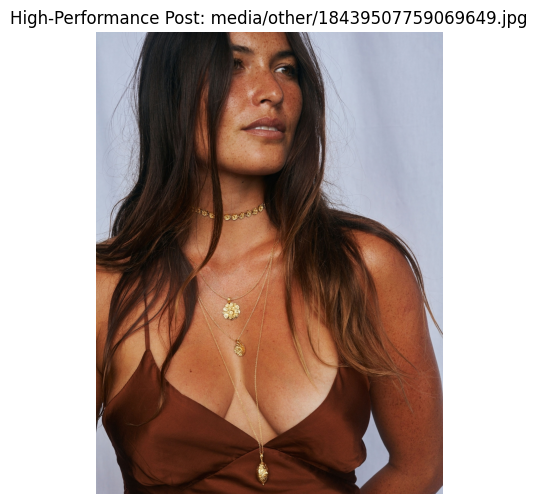

✅ Saved: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed\HPP_5.png


In [46]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

high_performance_posts = posts_model[posts_model["performance_label_log"] == "High"]

high_performance_uris = high_performance_posts["uri"].tolist()

image_folder = r"C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio"

save_folder = r"C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed"
os.makedirs(save_folder, exist_ok=True)

def show_and_save_images(uris):
    for idx, uri in enumerate(uris, start=1):
        image_path = os.path.join(image_folder, uri)
        print(f"Constructed image path: {image_path}")

        if os.path.exists(image_path):
            img = mpimg.imread(image_path)
            plt.figure(figsize=(6, 6))
            plt.imshow(img)
            plt.title(f"High-Performance Post: {uri}")
            plt.axis('off')

            save_path = os.path.join(save_folder, f"HPP_{idx}.png")
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            plt.show()
            
            print(f"✅ Saved: {save_path}")
        else:
            print(f"❌ Image not found for URI: {uri}")

show_and_save_images(high_performance_uris[:5])

Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/18005202119701873.jpg


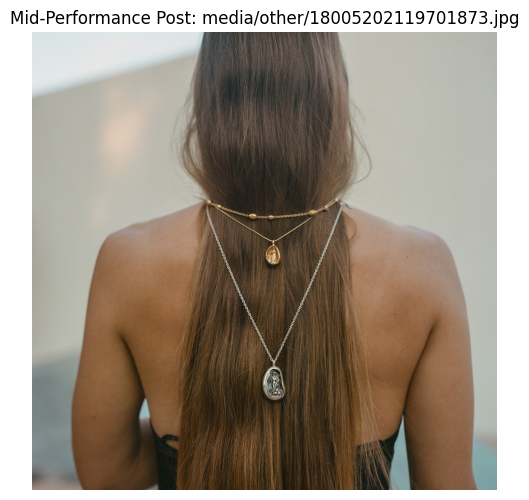

✅ Saved: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed\MPP_1.png
Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/17850460545325482.jpg


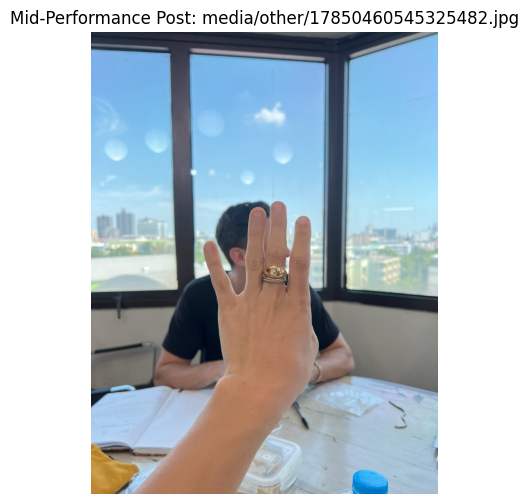

✅ Saved: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed\MPP_2.png
Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/18365546479137722.jpg


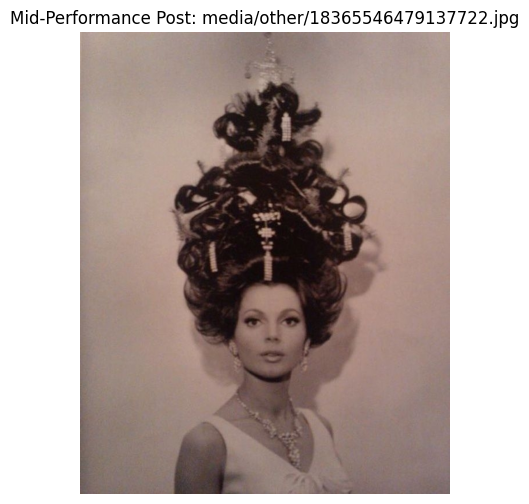

✅ Saved: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed\MPP_3.png
Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/17873021922248056.jpg


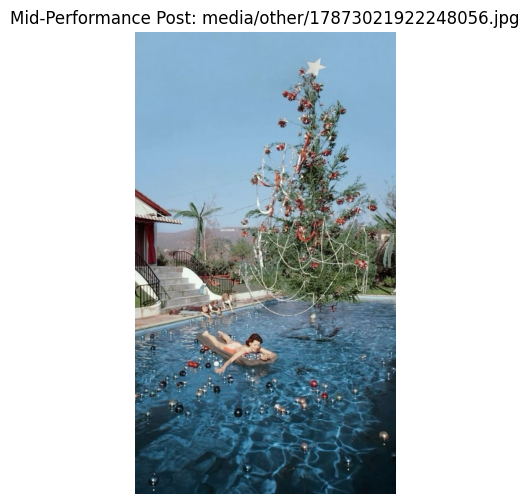

✅ Saved: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed\MPP_4.png
Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/18341377786181689.jpg


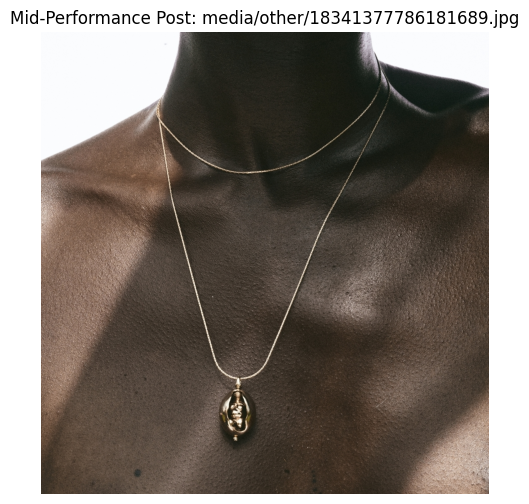

✅ Saved: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed\MPP_5.png


In [48]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

mid_performance_posts = posts_model[posts_model["performance_label_log"] == "Medium"]
mid_performance_uris = mid_performance_posts["uri"].tolist()

image_folder = r"C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio"
save_folder = r"C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed"
os.makedirs(save_folder, exist_ok=True)

def show_and_save_images(uris):
    for idx, uri in enumerate(uris, start=1):
        image_path = os.path.join(image_folder, uri)
        print(f"Constructed image path: {image_path}")

        if os.path.exists(image_path):
            img = mpimg.imread(image_path)
            plt.figure(figsize=(6, 6))
            plt.imshow(img)
            plt.title(f"Mid-Performance Post: {uri}")
            plt.axis('off')

            save_path = os.path.join(save_folder, f"MPP_{idx}.png")
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            plt.show()
            print(f"✅ Saved: {save_path}")
        else:
            print(f"❌ Image not found for URI: {uri}")

show_and_save_images(mid_performance_uris[:5])


Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/18067352005700577.jpg


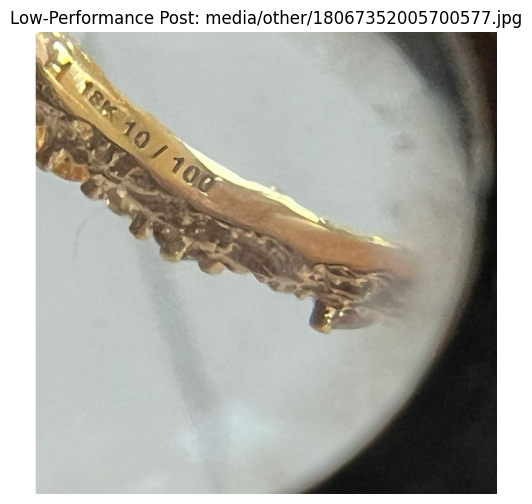

✅ Saved: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed\LPP_1.png
Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/18045234064965601.jpg


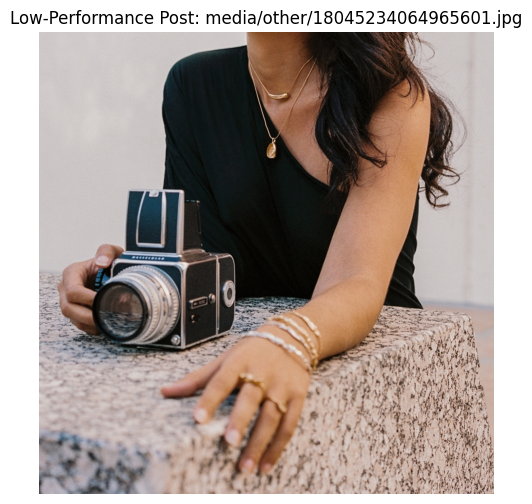

✅ Saved: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed\LPP_2.png
Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/18099787519433485.jpg


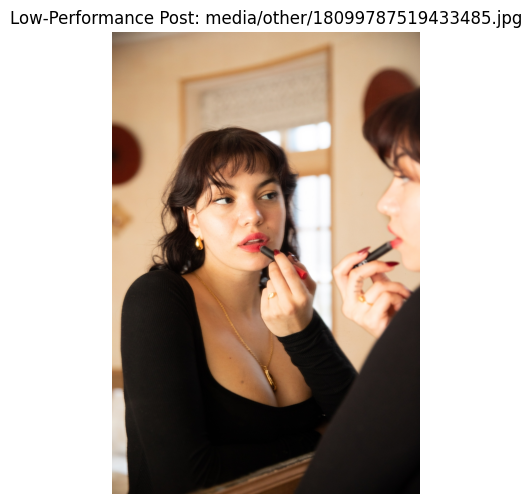

✅ Saved: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed\LPP_3.png
Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/18017275094400400.jpg


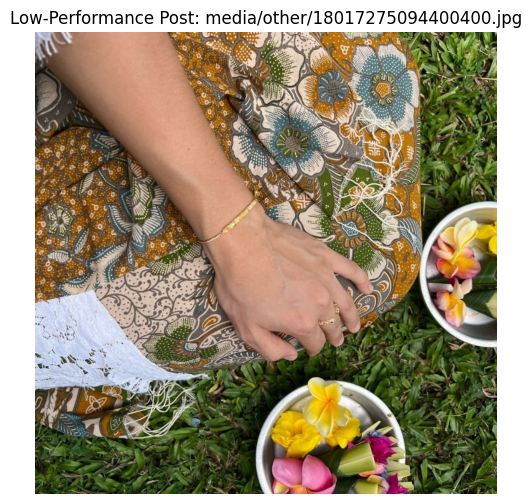

✅ Saved: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed\LPP_4.png
Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/17871385497248217.jpg


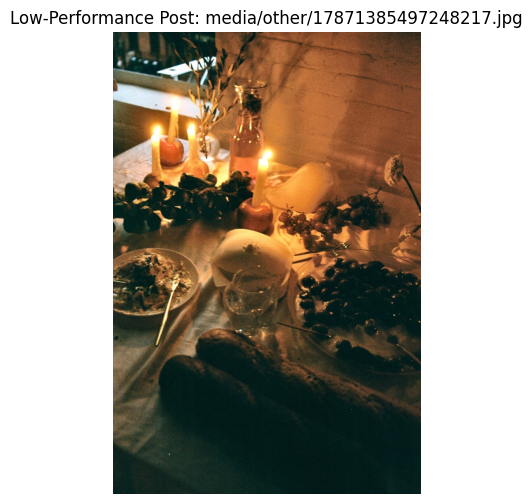

✅ Saved: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed\LPP_5.png


In [47]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

low_performance_posts = posts_model[posts_model["performance_label_log"] == "Low"]
low_performance_uris = low_performance_posts["uri"].tolist()

image_folder = r"C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio"
save_folder = r"C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed"
os.makedirs(save_folder, exist_ok=True)

def show_and_save_images(uris):
    for idx, uri in enumerate(uris, start=1):
        image_path = os.path.join(image_folder, uri)
        print(f"Constructed image path: {image_path}")

        if os.path.exists(image_path):
            img = mpimg.imread(image_path)
            plt.figure(figsize=(6, 6))
            plt.imshow(img)
            plt.title(f"Low-Performance Post: {uri}")
            plt.axis('off')

            save_path = os.path.join(save_folder, f"LPP_{idx}.png")
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            plt.show()
            print(f"✅ Saved: {save_path}")
        else:
            print(f"❌ Image not found for URI: {uri}")

show_and_save_images(low_performance_uris[:5])

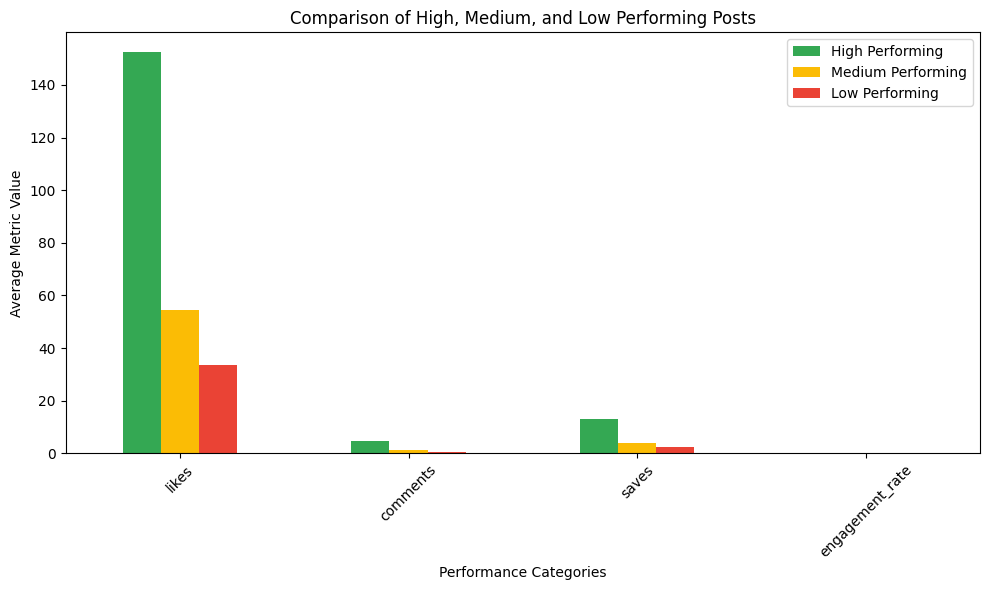

In [49]:
high_threshold = posts_model["log_engagement_rate"].quantile(0.75)
low_threshold = posts_model["log_engagement_rate"].quantile(0.25)

high_performance = posts_model[posts_model["log_engagement_rate"] >= high_threshold]

medium_performance = posts_model[(posts_model["log_engagement_rate"] < high_threshold) & 
                                  (posts_model["log_engagement_rate"] >= low_threshold)]

low_performance = posts_model[posts_model["log_engagement_rate"] <= low_threshold]

high_avg = high_performance[["likes", "comments", "saves", "engagement_rate"]].mean()
medium_avg = medium_performance[["likes", "comments", "saves", "engagement_rate"]].mean()
low_avg = low_performance[["likes", "comments", "saves", "engagement_rate"]].mean()

engagement_metrics = ["likes", "comments", "saves", "engagement_rate"]

performance_comparison = pd.DataFrame({
    "High Performing": high_avg,
    "Medium Performing": medium_avg,
    "Low Performing": low_avg
})

performance_comparison.plot(kind="bar", figsize=(10, 6), color=["#34a853", "#fbbc05", "#ea4335"])
plt.title("Comparison of High, Medium, and Low Performing Posts")
plt.ylabel("Average Metric Value")
plt.xlabel("Performance Categories")
plt.xticks(rotation=45)
plt.tight_layout()

save_dir = r"C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed"
filename = "Comparison_high_mid_low_performing_posts.png"
save_path = os.path.join(save_dir, filename)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

